<a href="https://colab.research.google.com/github/ivana2709/TP-Git/blob/master/projet_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Téléchargement de images 

In [ ]:

import urllib.request
from PIL import Image
from PIL.ExifTags import TAGS 
import html
import json
from bs4 import BeautifulSoup
  
with open("mont.html") as html_file:
  soup = BeautifulSoup(html_file, 'html.parser')

#téléchargement d'une image 
def download (i,Tab_link,folder):
    filename ='image{}.jpg'.format(i)
    full_path = '{}{}'.format(folder,filename)
    url = Tab_link
    response = urllib.request.urlretrieve(url,full_path)
    return 0 

#téléchargement de toutes les images 
def download_all ():
  Tab_link = []
  folder = 'images/'

  for link in soup.find_all("td"):
    Tab_link.append(link.text)

  for i in range (len(Tab_link)):
    download(i,Tab_link[i],folder)
  return 0

download_all()






On extrait les metada des images grace à leurs fichier Exif et on les stosk dans des fichiers json



In [ ]:
from PIL import Image
from PIL.ExifTags import TAGS 
import pandas as pd
import os

def metadata(tab_image):
  if tab_image=='.ipynb_checkpoints':
     return (0,0,0,0)
  else :
    img = "images/"+tab_image   
    images = Image.open(img)
    exif={}
    size= images.size
    form = images.format
    if images._getexif() is None :
      return (0, 0,0,0)
    else :
      for tag, value in images._getexif().items():
        if tag in TAGS:
            exif[TAGS[tag]] = value
    return (exif['DateTimeOriginal'], exif['Make']  , size,
              form )
    
def metadata_all ():
  tab_image =[] #contient les images 
  dates= []
  appareils= []
  tailles=[]
  formats=[]

  for element in os.listdir('images'):
    tab_image.append(element)
  print (tab_image)


  for i in range(1,10):  # for i in range(1,len(tab_image)):
    (date,appareil,taille,extension)=metadata(tab_image[i])
    dates.append (date)
    appareils.append(appareil)
    tailles.append(taille)
    formats.append(extension)

  #save tab to data frame 
  df1 = pd.DataFrame(dates)
  df2= pd.DataFrame(appareils)
  df4= pd.DataFrame(tailles)
  df5= pd.DataFrame(formats)

  #save data frame to json file
  df1.to_json('date.json') 
  df2.to_json('appareil.json')
  df4.to_json('taille.json')
  df5.to_json('format.json')

metadata_all ()


['image3.jpg', 'image7.jpg', 'image11.jpg', 'image2.jpg', 'image9.jpg', 'image5.jpg', 'image4.jpg', 'image6.jpg', '.ipynb_checkpoints', 'image0.jpg', 'image1.jpg', 'image14.jpg', 'image8.jpg', 'image10.jpg', 'image15.jpg', 'image13.jpg']


Visualisation des données : </br>
-Le nombre d'images disponibles pour chaque année </br>
-le nombre d'images disponibles pour les différents types : taille, orientation... </br>
-caractétistique des couleurs 

           0
0     Iphone
1      Canon
2       SONY
3  Panasonic
4      Canon
5     Iphone
6       SONY
7     Iphone
8      Canon
AxesSubplot(0.125,0.125;0.775x0.755)


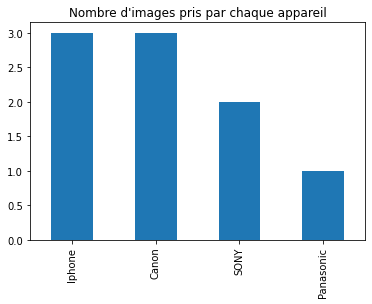

In [45]:
import pandas as pd
import os
import json
from pandas import json_normalize
import matplotlib.pyplot as plot

def visu_date ():
  jsondata = json.load(open('date.json'))
  df1= pd.DataFrame(jsondata , columns=['0'])

 #on parcours le dataframe des dates 
  for i in df1.index: 
    a=df1["0"][i] 
    if a == 0: 
      df1["0"][i] =int(2021) #2021 est l'année par defaut 
      #print (df1["0"][i])
    else :
      b=a.split(":",1)
      df1["0"][i] = int(b[0]) #on récupère uniquement l'année 
  df1=df1.astype(dtype={"0":"<i4"})
  #groupe = df1.groupby(['0']).count()
  d=pd.value_counts(df1['0'].values) #compte d'image par an
  #Tracé
  print(d.plot(x=0, kind='bar', title="Nombre d'images disponible par an"))

def visu_taille():
  jsondata = json.load(open('taille.json'))
  df2= pd.DataFrame(jsondata , columns=['0'])
  for i in df2.index:
    t = df2["0"][i]
    if t == 0:
      df2["0"][i] = 5000000 #taille par défaut
    else :
      df2["0"][i] = t[0]*t[1]  
  df2=df2.astype(dtype={"0":"<i4"})
  #groupe2 = df2.groupby(['0']).count()
  t=pd.value_counts(df2['0'].values) #compte le nombre de fois qu'une taille apparait
  #Tracé
  print(t.plot(x=0, kind='bar', title="Nombre d'images disponible par taille"))  
  
def appareil():
  jsondata=json.load(open('appareil.json'))
  df3= pd.DataFrame(jsondata,columns=['0'])
  for i in df3.index:
    t=df3["0"][i]
    if t== 0:
      df3["0"][i] = "Iphone" #appareil photo par défaut 
  a=pd.value_counts(df3['0'].values) #compte le nombre de fois qu'une taille apparait
  print(df3)
  print(a.plot(x=0, kind='bar', title="Nombre d'images pris par chaque appareil"))  

def visu_all():
  #visu_date()
  #visu_taille()
  appareil()


visu_all()

In [ ]:
import pandas as pd
import os

Test

In [ ]:
import os
import datetime
img='images/image3.jpg'
imagea = Image.open(img)
exif={}
img_exif=imagea.getexif()
taille=imagea.size

if img_exif is None :
  print (0)
else :
  for tag, value in img_exif.items():
      if tag in TAGS:
        exif[TAGS[tag]] =value
        fileName, fileExtension = os.path.splitext(img)
  print (taille)



(2272, 1704)
